In [1]:
# approach is from this website: 
# https://www.pluralsight.com/guides/explore-python-libraries:-imbalanced-learn
# SMOTE stands for “Synthetic Minority Oversampling Technique” and is 
# one of the most commonly utilized resampling techniques. At a high level, 
# to oversample, pick a sample from the minority class (call it S), and 
# then pick one of its neighbors, N. Then pick a random point on the line segment 
# between S and N. This random new point is the synthetic sample you 
# have created using SMOTE. Repeating this over and over you can create more 
# and more new samples to even out your class imbalance.

In [2]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# os.getcwd()

In [4]:
# os.listdir(os.getcwd())

In [5]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\all_param.csv")
all_param_df.shape


(39624, 351)

In [10]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [11]:
y_class

0        0
1        0
2        0
3        0
4        0
        ..
39619    1
39620    1
39621    1
39622    1
39623    1
Name: suc_class, Length: 39624, dtype: int64

In [12]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers']  , axis=1)

In [14]:
x_data.shape

(39624, 346)

In [15]:
# over sample the minor class via SMOTE so that the 2
# data sets are balanced

from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE().fit_sample(x_data, y_class)

In [16]:
# see classes are balanced
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:, 0].value_counts()

1    38818
0    38818
Name: suc_class, dtype: int64

In [17]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=5)

In [18]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [19]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

# from sklearn.preprocessing import MinMaxScaler
# x_scaler = MinMaxScaler().fit(X_train)

In [21]:
# apply the trained scales (MinMax) to the training and testing data

# X_train_scaled = x_scaler.transform(X_train)
# X_test_scaled = x_scaler.transform(X_test)

In [22]:
# Instantiate and Train model
y = y_train
X = X_train

clf_1 = LogisticRegression(max_iter=1000).fit(X_train, y_train)

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_1.score(X_test, y_test)}")

Training Data Score: 0.9162931286173082
Testing Data Score: 0.9106600030913494


In [24]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      9733
           1       0.94      0.88      0.91      9676

    accuracy                           0.91     19409
   macro avg       0.91      0.91      0.91     19409
weighted avg       0.91      0.91      0.91     19409



In [25]:
# thinking about baseline results:
# Support is balanced - ~9700 of 1's and 0's
# Percision: for no success: 89%, better for successful games: 94%
# Percision= % of labeling an outcome that is correct from all the labels of that outcome
# labeled cancer correctly from all labeled cancer
# Recall: Fraction of positives found, 94% for 0, 88% for 1
# Recall - % of true label found from all true cases of the label
# how many of the cancer cases did you find
# f1 score: 91% due to overfitting on failure cases

<AxesSubplot:>

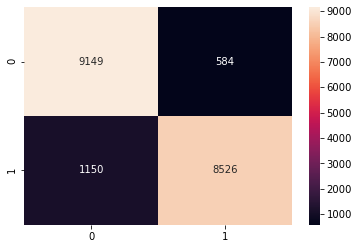

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [ ]:
# As you can see, by utilizing SMOTE we have ensured that the classifier produces 
# relatively balanced classifications, as opposed to an unsuccessful model, in which 
# the classifier might classify all samples as belonging to the majority class.